## Import libraries and Read in Data
2 files - Daily Stock price data, Sector mapping file

In [ ]:
# PowerAI 5.1 Environment support - py2 / tflow 1.5 / xxx


In [101]:
ENV="dustinsmac" # dustinsmac / nimbix
if(ENV == "dustinsmac") : 
    rootdir = "/data/work/git-repos/mldl-101/labxx-eigenportfolios/"
else :
    rootdir = "/data/mldl-101/labxx-eigenportfolios/"

In [102]:
import pandas as pd
import numpy as np
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
#ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
# A,1999-11-18,45.5,50.0,40.0,44.0,44739900.0,0.0,1.0,31.041951216877,34.112034304261,27.289627443409,30.018590187749,44739900.0
# A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,29.295415060499,29.336349501664,27.160001713052,27.548878904121,10897100.0

price_df = pd.read_csv(rootdir + "WIKI_PRICES.csv",header=0)
#price_df = pd.read_csv(rootdir + "WIKI_PRICES.10000.csv")


#price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/WIKI_PRICES.10000.csv")
sectors_df = pd.read_csv(rootdir + "sectors.csv")


In [103]:
print price_df.columns
print sectors_df.columns

Index([u'ticker', u'date', u'open', u'high', u'low', u'close', u'volume',
       u'ex-dividend', u'split_ratio', u'adj_open', u'adj_high', u'adj_low',
       u'adj_close', u'adj_volume'],
      dtype='object')
Index([u'Ticker symbol', u'Security', u'SEC filings', u'GICS Sector',
       u'GICS Sub Industry', u'Address of Headquarters',
       u'Date first added[3][4]', u'CIK'],
      dtype='object')


In [104]:
 price_df.head(3)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.0,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.0,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0


In [105]:
price_df.ticker.unique()

array(['A', 'AA', 'AAL', ..., 'ZQK', 'ZTS', 'ZUMZ'], dtype=object)

## Keep data within date range

In [106]:
# Type conversion for date column.  Just adding a new column called dt
price_df['dt'] = pd.to_datetime(price_df.date, unit='ns') # 
print(price_df.dtypes)

# For now use data from 2017 up through present
price_df = price_df[price_df.dt > '2017-01-01']
price_df = price_df[price_df.dt < '2018-04-01']

ticker                 object
date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dt             datetime64[ns]
dtype: object


In [107]:
price_df[price_df.ticker == 'EXXI'].head(500)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,dt
5113306,EXXI,2017-01-17,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-17
5113307,EXXI,2017-01-18,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-18
5113308,EXXI,2017-01-19,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-19
5113309,EXXI,2017-01-20,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-20
5113310,EXXI,2017-01-23,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-23
5113311,EXXI,2017-01-24,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-24
5113312,EXXI,2017-01-25,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-25
5113313,EXXI,2017-01-26,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-26
5113314,EXXI,2017-01-27,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-27
5113315,EXXI,2017-01-30,0.1300,0.1300,0.1300,0.1300,0.0,0.0,1.0,0.1300,0.1300,0.1300,0.1300,0.0,2017-01-30


In [108]:
# reshape pandas array .  Here lets just grab the closing value...
price_pvt_df = price_df.pivot(index='date', columns='ticker', values='close')

In [109]:
# use dummy data here if you want ..
#price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/dummydata.csv",index_col=0)
price_pvt_df["EXXI"]

date
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
2017-01-09        NaN
2017-01-10        NaN
2017-01-11        NaN
2017-01-12        NaN
2017-01-13        NaN
2017-01-17     0.1300
2017-01-18     0.1300
2017-01-19     0.1300
2017-01-20     0.1300
2017-01-23     0.1300
2017-01-24     0.1300
2017-01-25     0.1300
2017-01-26     0.1300
2017-01-27     0.1300
2017-01-30     0.1300
2017-01-31     0.1300
2017-02-01     0.1300
2017-02-02     0.1300
2017-02-03     0.1300
2017-02-06     0.1300
2017-02-07     0.1300
2017-02-08     0.1300
2017-02-09     0.1300
2017-02-10     0.1300
2017-02-13     0.1300
2017-02-14     0.1300
2017-02-15     0.1300
2017-02-16     0.1300
2017-02-17     0.1300
2017-02-21     0.1300
2017-02-22     0.1300
2017-02-23     0.1300
2017-02-24     0.1300
2017-02-27     0.1300
2017-02-28    32.5000
2017-03-01    30.2500
2017-03-02    29.0500
2017-03-03    29.0000
2017-03-06    30.8000
2017-03-07    30.7500
2017-03-08    30.0000
2017-

## Create daily return dataframe using pandas convenience function..

In [110]:
daily_return_df = price_pvt_df.pct_change()
# drop columns with 3 or more NaN
daily_return_df.dropna(axis=1, thresh=3, inplace=True)


In [111]:
# impute NaN
# Imputer not doing what I want .... just set return to 0 so you dont get crazy outliers ...
daily_return_df = daily_return_df.fillna(0)


In [112]:
# Find outliers ....
daily_return_df[daily_return_df > 0.5] = 0.0 # null out outliers ....
tmp = daily_return_df[daily_return_df > 0.5]
tmp.stack()

Series([], dtype: float64)

In [77]:
daily_return_df["EXXI"]

date
2017-01-03    0.000000
2017-01-04    0.000000
2017-01-05    0.000000
2017-01-06    0.000000
2017-01-09    0.000000
2017-01-10    0.000000
2017-01-11    0.000000
2017-01-12    0.000000
2017-01-13    0.000000
2017-01-17    0.000000
2017-01-18    0.000000
2017-01-19    0.000000
2017-01-20    0.000000
2017-01-23    0.000000
2017-01-24    0.000000
2017-01-25    0.000000
2017-01-26    0.000000
2017-01-27    0.000000
2017-01-30    0.000000
2017-01-31    0.000000
2017-02-01    0.000000
2017-02-02    0.000000
2017-02-03    0.000000
2017-02-06    0.000000
2017-02-07    0.000000
2017-02-08    0.000000
2017-02-09    0.000000
2017-02-10    0.000000
2017-02-13    0.000000
2017-02-14    0.000000
2017-02-15    0.000000
2017-02-16    0.000000
2017-02-17    0.000000
2017-02-21    0.000000
2017-02-22    0.000000
2017-02-23    0.000000
2017-02-24    0.000000
2017-02-27    0.000000
2017-02-28    0.000000
2017-03-01   -0.069231
2017-03-02   -0.039669
2017-03-03   -0.001721
2017-03-06    0.062069
2017-0

In [113]:
daily_return_df.head()

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.013121,0.049601,0.008639,0.055660,0.021003,0.017749,0.022489,0.008206,-0.001119,0.019517,0.011639,-0.003170,0.014100,0.024815,0.021739,-0.027616,0.024000,0.015686,0.030082,0.007939,0.110184,0.057308,0.027254,0.022727,0.019204,...,-0.027523,0.014904,0.005108,0.010477,0.031397,0.029820,0.011749,0.044313,0.003639,0.011019,-0.003493,0.049296,0.009194,0.009043,0.004519,0.047306,0.011765,0.014358,0.058501,0.008065,0.045527,0.015094,0.048978,0.009703,0.034091
2017-01-05,-0.011890,0.012888,-0.017345,0.036640,-0.038686,-0.029775,-0.029326,-0.000698,0.005085,0.001823,-0.019175,-0.014964,0.007584,-0.011576,-0.010078,0.020927,-0.018750,-0.020994,-0.008035,0.008638,-0.008140,-0.007917,0.004987,-0.014815,-0.019740,...,-0.141509,-0.009129,-0.008112,-0.014689,0.005074,0.031952,-0.010323,-0.020509,0.003310,-0.029973,-0.018064,-0.020134,0.006425,-0.026198,0.004948,-0.010998,0.011628,-0.016210,-0.027634,-0.018000,-0.037418,-0.014870,0.037353,-0.003327,-0.094505
2017-01-06,0.031156,0.000979,0.006973,0.017241,-0.014372,-0.017098,-0.012085,-0.013091,0.011148,-0.005232,-0.007820,0.017850,0.000314,0.013384,-0.002262,0.064422,-0.016720,-0.018733,0.005313,0.027204,0.030303,-0.019030,0.004764,-0.011278,-0.016934,...,-0.025604,-0.007010,0.004073,0.006431,-0.007824,-0.002661,-0.035202,-0.013718,0.012097,0.005618,0.007688,0.013699,0.000095,0.014277,0.005819,-0.046465,-0.019157,0.006498,0.024867,-0.002037,-0.018641,0.026415,0.008219,0.003152,-0.036408
2017-01-09,0.003126,-0.039113,0.018827,0.015254,0.012638,-0.008029,0.003058,-0.000590,0.009160,-0.014635,0.004926,0.026493,0.006584,0.008019,-0.027211,-0.030261,0.008097,-0.010048,0.014642,-0.000981,0.001532,-0.076345,-0.010865,-0.030418,0.003724,...,-0.023119,-0.004236,-0.014116,-0.014813,0.021114,0.002668,-0.033784,-0.024890,0.002794,-0.005587,0.006812,-0.020270,0.019436,0.000116,0.032043,0.022907,-0.003906,-0.010837,-0.003466,0.006122,-0.010656,-0.022059,-0.081522,-0.002773,0.005038


## Plot some series

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

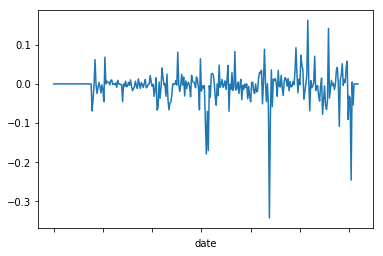

In [115]:
plt.figure()
daily_return_df.EXXI.plot()
#daily_return_df.AAMC.plot()
#daily_return_df.IBM.plot()

#daily_return_df.S1.plot()
#daily_return_df.S11.plot()
#daily_return_df.S2.plot()
#daily_return_df.S3.plot()


## Optional  : Save intermediate file and read back in .. Next time can start here

In [80]:
#daily_return_df.to_csv(path_or_buf='daily_return_2017.csv')
#daily_return_df = pd.read_csv('daily_return_2017.csv')

In [116]:
daily_return_df.head(15)

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.013121,0.049601,0.008639,0.055660,0.021003,0.017749,0.022489,0.008206,-0.001119,0.019517,0.011639,-0.003170,0.014100,0.024815,0.021739,-0.027616,0.024000,0.015686,0.030082,0.007939,0.110184,0.057308,0.027254,0.022727,0.019204,...,-0.027523,0.014904,0.005108,0.010477,0.031397,0.029820,0.011749,0.044313,0.003639,0.011019,-0.003493,0.049296,0.009194,0.009043,0.004519,0.047306,0.011765,0.014358,0.058501,0.008065,0.045527,0.015094,0.048978,0.009703,0.034091
2017-01-05,-0.011890,0.012888,-0.017345,0.036640,-0.038686,-0.029775,-0.029326,-0.000698,0.005085,0.001823,-0.019175,-0.014964,0.007584,-0.011576,-0.010078,0.020927,-0.018750,-0.020994,-0.008035,0.008638,-0.008140,-0.007917,0.004987,-0.014815,-0.019740,...,-0.141509,-0.009129,-0.008112,-0.014689,0.005074,0.031952,-0.010323,-0.020509,0.003310,-0.029973,-0.018064,-0.020134,0.006425,-0.026198,0.004948,-0.010998,0.011628,-0.016210,-0.027634,-0.018000,-0.037418,-0.014870,0.037353,-0.003327,-0.094505
2017-01-06,0.031156,0.000979,0.006973,0.017241,-0.014372,-0.017098,-0.012085,-0.013091,0.011148,-0.005232,-0.007820,0.017850,0.000314,0.013384,-0.002262,0.064422,-0.016720,-0.018733,0.005313,0.027204,0.030303,-0.019030,0.004764,-0.011278,-0.016934,...,-0.025604,-0.007010,0.004073,0.006431,-0.007824,-0.002661,-0.035202,-0.013718,0.012097,0.005618,0.007688,0.013699,0.000095,0.014277,0.005819,-0.046465,-0.019157,0.006498,0.024867,-0.002037,-0.018641,0.026415,0.008219,0.003152,-0.036408
2017-01-09,0.003126,-0.039113,0.018827,0.015254,0.012638,-0.008029,0.003058,-0.000590,0.009160,-0.014635,0.004926,0.026493,0.006584,0.008019,-0.027211,-0.030261,0.008097,-0.010048,0.014642,-0.000981,0.001532,-0.076345,-0.010865,-0.030418,0.003724,...,-0.023119,-0.004236,-0.014116,-0.014813,0.021114,0.002668,-0.033784,-0.024890,0.002794,-0.005587,0.006812,-0.020270,0.019436,0.000116,0.032043,0.022907,-0.003906,-0.010837,-0.003466,0.006122,-0.010656,-0.022059,-0.081522,-0.002773,0.005038
2017-01-10,-0.000831,0.050882,0.029737,0.000835,0.038080,0.028327,0.018293,0.002300,0.001008,0.001857,0.022549,-0.116867,-0.002180,-0.007604,0.018648,0.001418,0.019277,0.004060,-0.041585,0.013500,-0.037320,-0.045393,-0.010186,0.019608,-0.006030,...,-0.007273,-0.004659,-0.005392,0.010318,0.006477,0.023222,0.015385,-0.012763,0.005882,0.002809,-0.008119,-0.013793,0.062336,-0.006165,-0.011212,0.115635,0.000000,0.015385,0.013913,0.006085,-0.046827,-0.022556,-0.000845,-0.000371,0.012531
2017-01-11,0.023909,0.031956,0.003300,0.070058,0.001850,-0.006559,0.010479,0.020657,0.005373,-0.003706,0.019175,0.033546,-0.045731,-0.038901,0.019451,0.024079,-0.002364,0.016174,-0.008642,-0.005086,-0.050842,-0.014194,-0.007869,-0.015385,-0.006533,...,0.018723,0.005291,0.016464,0.004377,0.007426,0.006856,0.023416,0.002281,-0.007541,0.025210,-0.015553,-0.027972,0.009501,-0.005267,0.024422,-0.002920,-0.070588,0.008264,-0.072041,0.004032,0.005650,0.011538,-0.024958,-0.011496,-0.022277
2017-01-12,-0.014822,0.033469,-0.011102,-0.005456,-0.002769,0.314261,-0.034074,0.005997,-0.004175,0.002558,-0.024459,-0.014735,0.002290,0.028578,-0.029181,0.161826,0.005529,-0.010943,0.009886,-0.008763,0.063944,-0.017279,0.001627,-0.023438,-0.031000,...,-0.041096,-0.022267,-0.000968,-0.025276,-0.000246,-0.011270,-0.0390

## Start some data analysis here !

In [82]:
daily_return_df.corr().head(20)


ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.215298,0.339687,0.052379,0.173912,0.020911,0.264599,0.063973,0.393732,0.108365,0.277435,0.314322,0.349067,0.228827,0.301007,0.048971,0.214602,0.292551,0.391496,0.515841,0.253960,0.123415,0.189125,0.256789,0.080056,...,0.172428,0.473813,0.311292,0.177287,0.249894,0.078443,0.174521,0.313941,0.389319,0.069152,0.216658,0.180389,0.379905,0.272743,0.341889,0.153696,0.266427,0.367347,0.197738,0.141021,0.063268,0.281898,0.009990,0.531726,-0.015393
AA,0.215298,1.000000,0.245279,0.122469,0.054915,0.072119,0.227639,0.019364,0.259346,0.100635,0.275816,0.083072,0.099194,0.118054,0.267399,0.083895,0.167182,0.184144,0.146667,0.175910,0.167386,-0.055443,-0.026264,0.210818,0.212608,...,0.036378,0.232524,0.170859,0.128199,0.178077,0.189839,0.078634,0.232560,0.155110,0.116707,0.267398,0.099307,0.225465,0.250636,0.107186,0.393332,0.021487,0.275165,0.148214,0.040037,0.017944,0.142843,0.160017,0.111054,0.097447
AAL,0.339687,0.245279,1.000000,0.048557,0.181995,0.051212,0.270853,0.120718,0.299161,0.162404,0.337349,0.081091,0.164298,0.228634,0.329139,0.025402,0.201204,0.272544,0.122119,0.260613,0.135843,0.011132,0.046161,0.241420,0.093359,...,0.167355,0.233476,0.257298,0.163587,0.138032,0.185100,0.142504,0.241718,0.242590,0.018384,0.118248,0.060329,0.236722,0.276892,0.226554,0.182374,0.163161,0.392114,0.153154,0.145784,0.036307,0.180743,0.151784,0.228067,0.124667
AAMC,0.052379,0.122469,0.048557,1.000000,-0.026733,0.036620,0.030304,-0.032780,0.050269,0.038675,0.073224,-0.053096,-0.060444,-0.009337,0.023263,0.103960,0.061163,0.045773,-0.019792,0.019683,0.044359,-0.048311,0.070523,-0.070001,0.037767,...,-0.026379,0.010342,-0.037532,-0.076049,-0.027585,0.010006,0.095114,0.004564,0.104741,0.024190,0.092964,0.019300,0.057548,0.034051,0.020484,-0.004343,0.026735,-0.046777,0.060465,0.116018,-0.011947,0.075558,-0.018297,0.055444,0.025731
AAN,0.173912,0.054915,0.181995,-0.026733,1.000000,0.028370,0.179545,0.148556,0.075444,0.080996,0.220089,-0.024910,0.140778,0.140796,0.198486,0.087711,0.224826,0.272661,0.166689,0.150946,0.117948,0.018480,0.036933,0.228900,0.105185,...,0.243131,0.145066,0.210498,0.071099,0.107791,0.046609,0.090354,0.175908,0.138905,0.080214,0.114215,0.050425,0.194044,0.166733,0.116129,0.265134,0.114063,0.197711,0.106367,0.084224,-0.005166,0.089101,0.085351,0.179777,0.167392
AAOI,0.020911,0.072119,0.051212,0.036620,0.028370,1.000000,-0.039090,0.040809,0.148859,-0.016940,-0.102589,-0.012345,0.050701,0.100628,-0.012130,0.283093,0.032619,0.122037,0.114481,0.006101,0.038617,-0.017648,0.018782,0.074060,-0.016890,...,-0.117904,0.016980,-0.027440,-0.054170,-0.146484,0.058659,-0.004401,-0.028634,0.017769,0.025476,0.236216,0.032482,0.132351,0.049033,0.044295,0.075389,0.050677,0.003940,0.048673,0.115013,0.078756,0.218392,-0.143534,0.052911,0.096930
AAON,0.264599,0.227639,0.270853,0.030304,0.179545,-0.039090,1.000000,0.168466,0.191383,0.126703,0.282021,0.158822,0.087728,0.105148,0.436670,-0.101670,0.306531,0.337685,0.199337,0.250491,0.139696,0.092056,0.013439,0.341924,0.182836,...,0.079130,0.428629,0.242038,0.212805,0.255191,0.190083,0.326929,0.336146,0.180625,0.075195,0.103875,0.167867,0.275457,0.209974,0.162213,0.209528,0.115773,0.384355,0.095178,0.119691,0.101818,0.068340,0.152764,0.139278,0.172670
AAP,0.063973,0.019364,0.120718,-0.032780,0.148556,0.040809,0.168466,1.000000,-0.007635,0.105632,0.038534,0.130403,0.096735,0.107301,0.216910,-0.018796,0.308324,0.174220,0.054322,0.140953,0.009635,-0.007228,0.095942,0.135983,0.113230,...,0.099138,0.126041,0.208952,0.019556,0.083063,-0.040754,0.171567,0.188597,0.132518,-0.068352,-0.006715,0.061225,0.098557,0.008660,0.018493,0.087459,-0.024500,0.262278,0.031094,0.011469,-0.002250,0.002024,0.260431,0.123890,0.24

In [117]:
num_symbols = len(daily_return_df.columns)
num_symbols

2683

In [118]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
dr_pca_df = pca.fit_transform(daily_return_df)

In [119]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_


array([0.10853, 0.0241 , 0.02125, 0.01483, 0.01251, 0.0109 , 0.0103 ,
       0.00958, 0.00939, 0.00866, 0.00861, 0.00825, 0.00788, 0.00778,
       0.00748, 0.00737, 0.007  , 0.00694, 0.0069 , 0.00664, 0.00649,
       0.00637, 0.00635, 0.00623, 0.00618, 0.00606, 0.00603, 0.00592,
       0.00585, 0.00578, 0.00574, 0.00571, 0.00564, 0.0056 , 0.0055 ,
       0.0055 , 0.0054 , 0.0053 , 0.00529, 0.00523, 0.00512, 0.00508,
       0.00497, 0.00491, 0.00487, 0.00483, 0.00478, 0.00472, 0.00468,
       0.00466, 0.00463, 0.0046 , 0.00452, 0.00449, 0.00442, 0.00436,
       0.00429, 0.00428, 0.00424, 0.0042 , 0.00418, 0.00414, 0.00407,
       0.00406, 0.00401, 0.004  , 0.00397, 0.00393, 0.00389, 0.00386,
       0.00382, 0.00377, 0.00375, 0.0037 , 0.00368, 0.00367, 0.00364,
       0.00359, 0.00356, 0.00354, 0.0035 , 0.00348, 0.00338, 0.00336,
       0.00335, 0.00331, 0.00328, 0.00326, 0.00321, 0.00318, 0.00317,
       0.00311, 0.00308, 0.00306, 0.00302, 0.003  , 0.00296, 0.00295,
       0.00292, 0.00

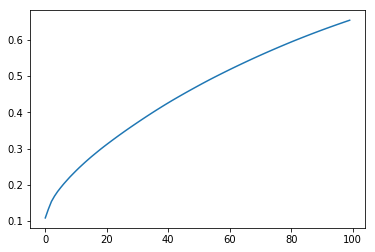

In [120]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum
plt.figure()
plt.plot(cumsum)

In [86]:
# Experiment 1 : Try one week intervals
# 

In [87]:
n_components=20
Col_headings = ['P'+str(x) for x in range(n_components)]
pcomps = pd.DataFrame(dr_pca_df) 
pcomps.columns = Col_headings
# concatenate the Churn column on the end so its easy to plot by Churn
# if 'Churn' not in pcomps.columns:
#    pcomps = pd.concat([pcomps, label], axis=1)
pcomps.head()


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19
0,0.008858,0.029744,0.004571,0.004544,-0.012559,-0.014469,0.008853,-0.003362,-0.007439,-0.019075,-0.009441,0.000589,-0.007616,0.003352,-0.005194,0.004130,0.001349,-0.007947,-0.006856,-0.000570
1,-0.914664,-0.105267,-0.305665,0.127108,-0.228812,-0.079000,-0.020606,0.022287,0.054918,-0.043265,-0.103701,-0.072463,0.121484,0.048220,0.076404,-0.228108,-0.091689,-0.052692,-0.083038,-0.012564
2,0.520211,0.043731,-0.349031,-0.196918,0.035798,-0.024604,0.006997,0.062789,-0.133078,-0.045347,-0.175213,0.119295,-0.105167,0.164209,-0.042119,0.113941,0.182512,0.101950,-0.113266,-0.046302
3,0.145496,-0.176682,-0.170459,-0.085527,-0.067347,0.118207,-0.161029,-0.088291,-0.049770,0.007253,0.051735,-0.027124,-0.034276,0.043088,-0.108188,0.113604,0.005328,0.072605,-0.076053,0.061361
4,0.421044,-0.302285,-0.155085,0.079952,-0.056807,-0.146199,0.115392,-0.094594,-0.106334,0.153741,0.022923,0.053778,-0.029557,0.000943,-0.047862,0.058041,0.045338,0.094556,-0.025959,0.024342


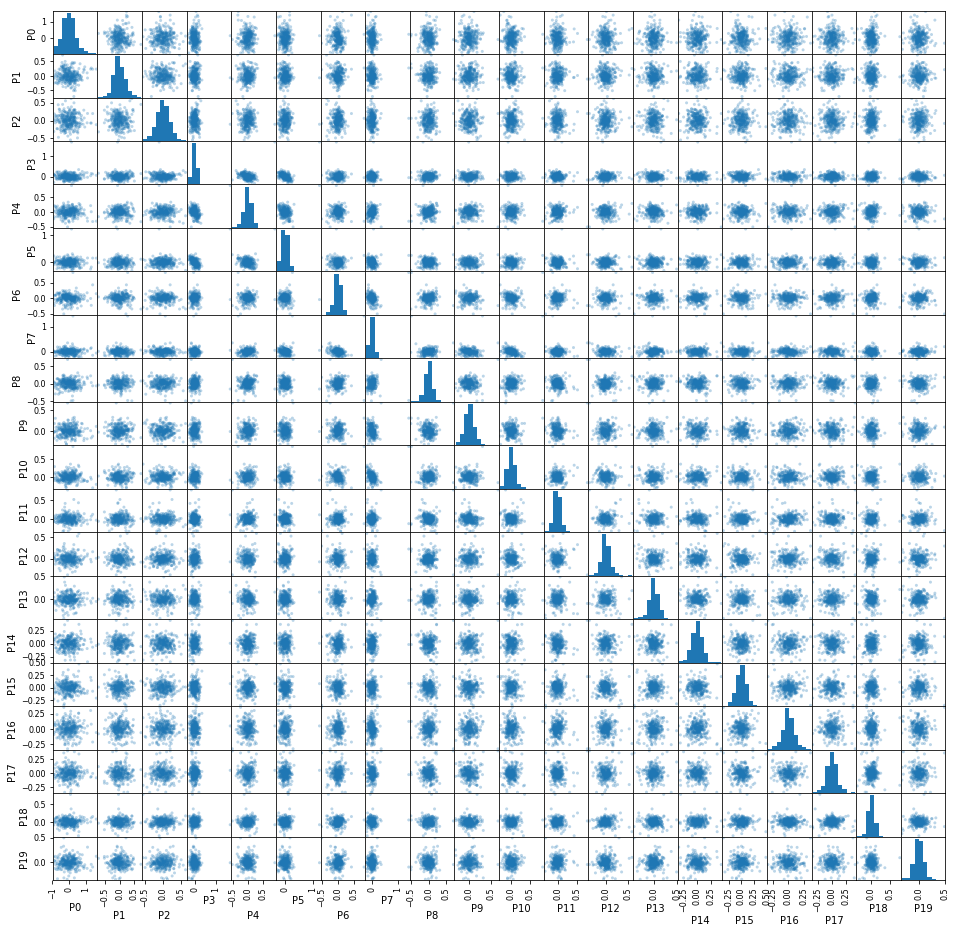

In [88]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# make a scatter plot
# pd.plotting.scatter_matrix(pcomps[pcomps['P0'] <1], alpha =.3,  figsize=[16,16])
pd.plotting.scatter_matrix(pcomps, alpha =.3,  figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='x',c=churn_cat_encode_new2.InternetService0.astype('int').apply(lambda x:churn_colors[x]), figsize=[16,16])

plt.show()

### New idea ~ Transpose .. run pca / kmeans for fun

In [121]:
daily_return_tpdf = daily_return_df.transpose()
daily_return_tpdf.head()

date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-06,2017-02-07,...,2018-02-21,2018-02-22,2018-02-23,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-19,2018-03-20,2018-03-21,2018-03-22,2018-03-23,2018-03-26,2018-03-27
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.013121,-0.011890,0.031156,0.003126,-0.000831,0.023909,-0.014822,0.003504,-0.007599,-0.001449,-0.012642,-0.000420,-0.004830,-0.000844,0.022386,-0.004958,0.009965,-0.020144,0.027271,0.005922,-0.007308,0.009816,-0.002228,0.007510,...,0.002392,-0.008000,0.000283,-0.001697,-0.022386,-0.005942,-0.017641,0.001929,0.000593,0.008290,0.023345,0.002152,0.018325,-0.005905,-0.000424,-0.010753,0.003719,-0.003990,-0.008011,0.007355,-0.006442,-0.027810,-0.020898,0.032395,-0.017595
AA,0.0,0.049601,0.012888,0.000979,-0.039113,0.050882,0.031956,0.033469,-0.000908,-0.011209,0.066483,0.017524,0.006776,0.017667,0.033343,-0.025867,-0.006296,0.010193,-0.003272,-0.002736,-0.005213,0.039162,-0.021762,0.024145,0.005828,...,-0.010818,0.009674,-0.027286,-0.000428,-0.009854,-0.027045,0.002224,0.010428,0.002415,0.029354,0.018940,-0.008563,0.008216,0.010447,0.004756,-0.041572,0.007730,0.006392,-0.018420,0.002373,0.031849,-0.063191,-0.004675,0.023708,-0.019008
AAL,0.0,0.008639,-0.017345,0.006973,0.018827,0.029737,0.003300,-0.011102,-0.009356,-0.018888,0.019037,-0.007976,0.015658,-0.022083,0.012782,0.007783,0.035066,-0.053237,-0.043663,-0.014477,-0.004520,-0.000908,0.004317,0.024887,-0.002870,...,0.020882,0.003409,0.007739,0.030155,-0.013455,-0.000184,-0.014194,-0.005610,0.000188,0.007144,0.010080,0.012567,0.023362,0.007669,-0.004779,-0.016895,-0.001990,0.004169,-0.014079,0.012816,-0.022234,-0.032908,-0.024852,0.016663,-0.018511
AAMC,0.0,0.055660,0.036640,0.017241,0.015254,0.000835,0.070058,-0.005456,0.083978,0.012178,0.004286,0.038407,-0.014384,-0.124392,0.014286,-0.022692,-0.044836,0.038558,0.004843,0.008835,0.035032,0.238297,-0.051427,0.051081,0.005047,...,0.000000,0.060249,0.003692,0.000000,0.000000,0.000000,-0.039706,0.021440,-0.022489,0.000000,0.023773,0.003745,-0.021642,-0.025172,0.017214,-0.098462,0.039249,0.032841,-0.029412,-0.004095,0.000000,-0.010197,-0.030409,0.004284,0.113481
AAN,0.0,0.021003,-0.038686,-0.014372,0.012638,0.038080,0.001850,-0.002769,-0.011108,-0.000936,0.009057,-0.096565,0.038369,0.011217,0.027732,0.001270,-0.018706,-0.013247,0.004257,0.008803,-0.004525,-0.004545,-0.023810,-0.004678,-0.003021,...,0.030545,0.008208,0.014699,0.016715,0.007234,0.005658,0.005194,0.017438,-0.007194,0.022592,-0.003335,0.016939,-0.013778,0.019391,-0.011045,-0.000207,-0.010137,0.009822,-0.020281,0.004225,-0.003576,-0.030188,-0.013931,0.020530,-0.017521


In [122]:
## PCA
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 100)
stk_pca_df = pca2.fit_transform(daily_return_tpdf)
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca2.explained_variance_ratio_

array([0.03012, 0.02491, 0.02166, 0.01618, 0.01332, 0.01195, 0.0111 ,
       0.01042, 0.01017, 0.00953, 0.00914, 0.00898, 0.00865, 0.00824,
       0.00809, 0.00799, 0.00769, 0.00761, 0.00757, 0.00726, 0.00712,
       0.00698, 0.00694, 0.00679, 0.00674, 0.00661, 0.00659, 0.00646,
       0.00639, 0.0063 , 0.00626, 0.00623, 0.00613, 0.00611, 0.00602,
       0.00601, 0.00583, 0.00579, 0.00572, 0.00563, 0.00559, 0.0055 ,
       0.00544, 0.00538, 0.00531, 0.00525, 0.00517, 0.00515, 0.00513,
       0.00509, 0.00507, 0.00499, 0.00493, 0.00489, 0.00483, 0.00477,
       0.00472, 0.00469, 0.00467, 0.00458, 0.00457, 0.00452, 0.00445,
       0.00444, 0.0044 , 0.00435, 0.00434, 0.00427, 0.00425, 0.00419,
       0.00417, 0.00413, 0.00411, 0.00405, 0.00401, 0.00397, 0.00397,
       0.00394, 0.00392, 0.00384, 0.00384, 0.00379, 0.00376, 0.00371,
       0.00366, 0.0036 , 0.00356, 0.00356, 0.00353, 0.00352, 0.00347,
       0.00343, 0.00339, 0.00338, 0.00335, 0.00332, 0.00325, 0.00324,
       0.00319, 0.00